In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC as SupportVectorMachineClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from imblearn.under_sampling import NearMiss
from scipy.stats import wilcoxon

In [ ]:
df = pd.read_csv('../content/NPHA-doctor-visits.csv')

In [ ]:
df

,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race,Gender
0,3,2,4,3,3,3,0,0,0,0,1,2,3,1,2
1,2,2,4,2,3,3,1,0,0,1,0,3,3,1,1
2,3,2,3,2,3,3,0,0,0,0,1,3,3,4,1
3,1,2,3,2,3,3,0,0,0,1,0,3,3,4,2
4,3,2,3,3,3,3,1,0,0,0,0,2,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,2,2,2,2,2,3,0,0,0,1,0,3,3,1,1
710,3,2,2,2,2,2,1,0,0,0,1,2,3,1,2
711,3,2,4,2,3,3,0,0,0,0,0,3,3,1,1
712,3,2,3,1,3,3,1,0,1,1,1,3,3,1,2


In [ ]:
df.shape

(714, 15)

In [ ]:
df.isna().sum()

,0
Number of Doctors Visited,0
Age,0
Phyiscal Health,0
Mental Health,0
Dental Health,0
Employment,0
Stress Keeps Patient from Sleeping,0
Medication Keeps Patient from Sleeping,0
Pain Keeps Patient from Sleeping,0
Bathroom Needs Keeps Patient from Sleeping,0


In [ ]:
df = df.drop(columns='Trouble Sleeping')

In [ ]:
df

,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Prescription Sleep Medication,Race,Gender
0,3,2,4,3,3,3,0,0,0,0,1,3,1,2
1,2,2,4,2,3,3,1,0,0,1,0,3,1,1
2,3,2,3,2,3,3,0,0,0,0,1,3,4,1
3,1,2,3,2,3,3,0,0,0,1,0,3,4,2
4,3,2,3,3,3,3,1,0,0,0,0,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,2,2,2,2,2,3,0,0,0,1,0,3,1,1
710,3,2,2,2,2,2,1,0,0,0,1,3,1,2
711,3,2,4,2,3,3,0,0,0,0,0,3,1,1
712,3,2,3,1,3,3,1,0,1,1,1,3,1,2


In [ ]:
#histograma das features

# features = df.select_dtypes(include=['number']).columns

# for feature in features:
#     plt.figure(figsize=(8, 6))
#     sns.histplot(data=df, x=feature, hue='Number of Doctors Visited', kde=False, bins=50, palette="pastel")

#     plt.xlabel(feature)
#     plt.ylabel("Contagem")
#     plt.title(f"Distribuição da feature: {feature}")
#     plt.legend(title="Class")
#     plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Number of Doctors Visited                   714 non-null    int64
 1   Age                                         714 non-null    int64
 2   Phyiscal Health                             714 non-null    int64
 3   Mental Health                               714 non-null    int64
 4   Dental Health                               714 non-null    int64
 5   Employment                                  714 non-null    int64
 6   Stress Keeps Patient from Sleeping          714 non-null    int64
 7   Medication Keeps Patient from Sleeping      714 non-null    int64
 8   Pain Keeps Patient from Sleeping            714 non-null    int64
 9   Bathroom Needs Keeps Patient from Sleeping  714 non-null    int64
 10  Uknown Keeps Patient from Sleeping    

In [ ]:
df.describe()

,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Prescription Sleep Medication,Race,Gender
count,714.000000,714.0,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.00000
mean,2.112045,2.0,2.794118,1.988796,3.009804,2.806723,0.247899,0.056022,0.218487,0.504202,0.417367,2.829132,1.425770,1.55042
std,0.683441,0.0,0.900939,0.939928,1.361117,0.586582,0.432096,0.230126,0.413510,0.500333,0.493470,0.546767,1.003896,0.49780
min,1.000000,2.0,-1.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,1.00000
25%,2.000000,2.0,2.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.00000
50%,2.000000,2.0,3.000000,2.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,2.00000
75%,3.000000,2.0,3.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,1.000000,2.00000
max,3.000000,2.0,5.000000,5.000000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,5.000000,2.00000


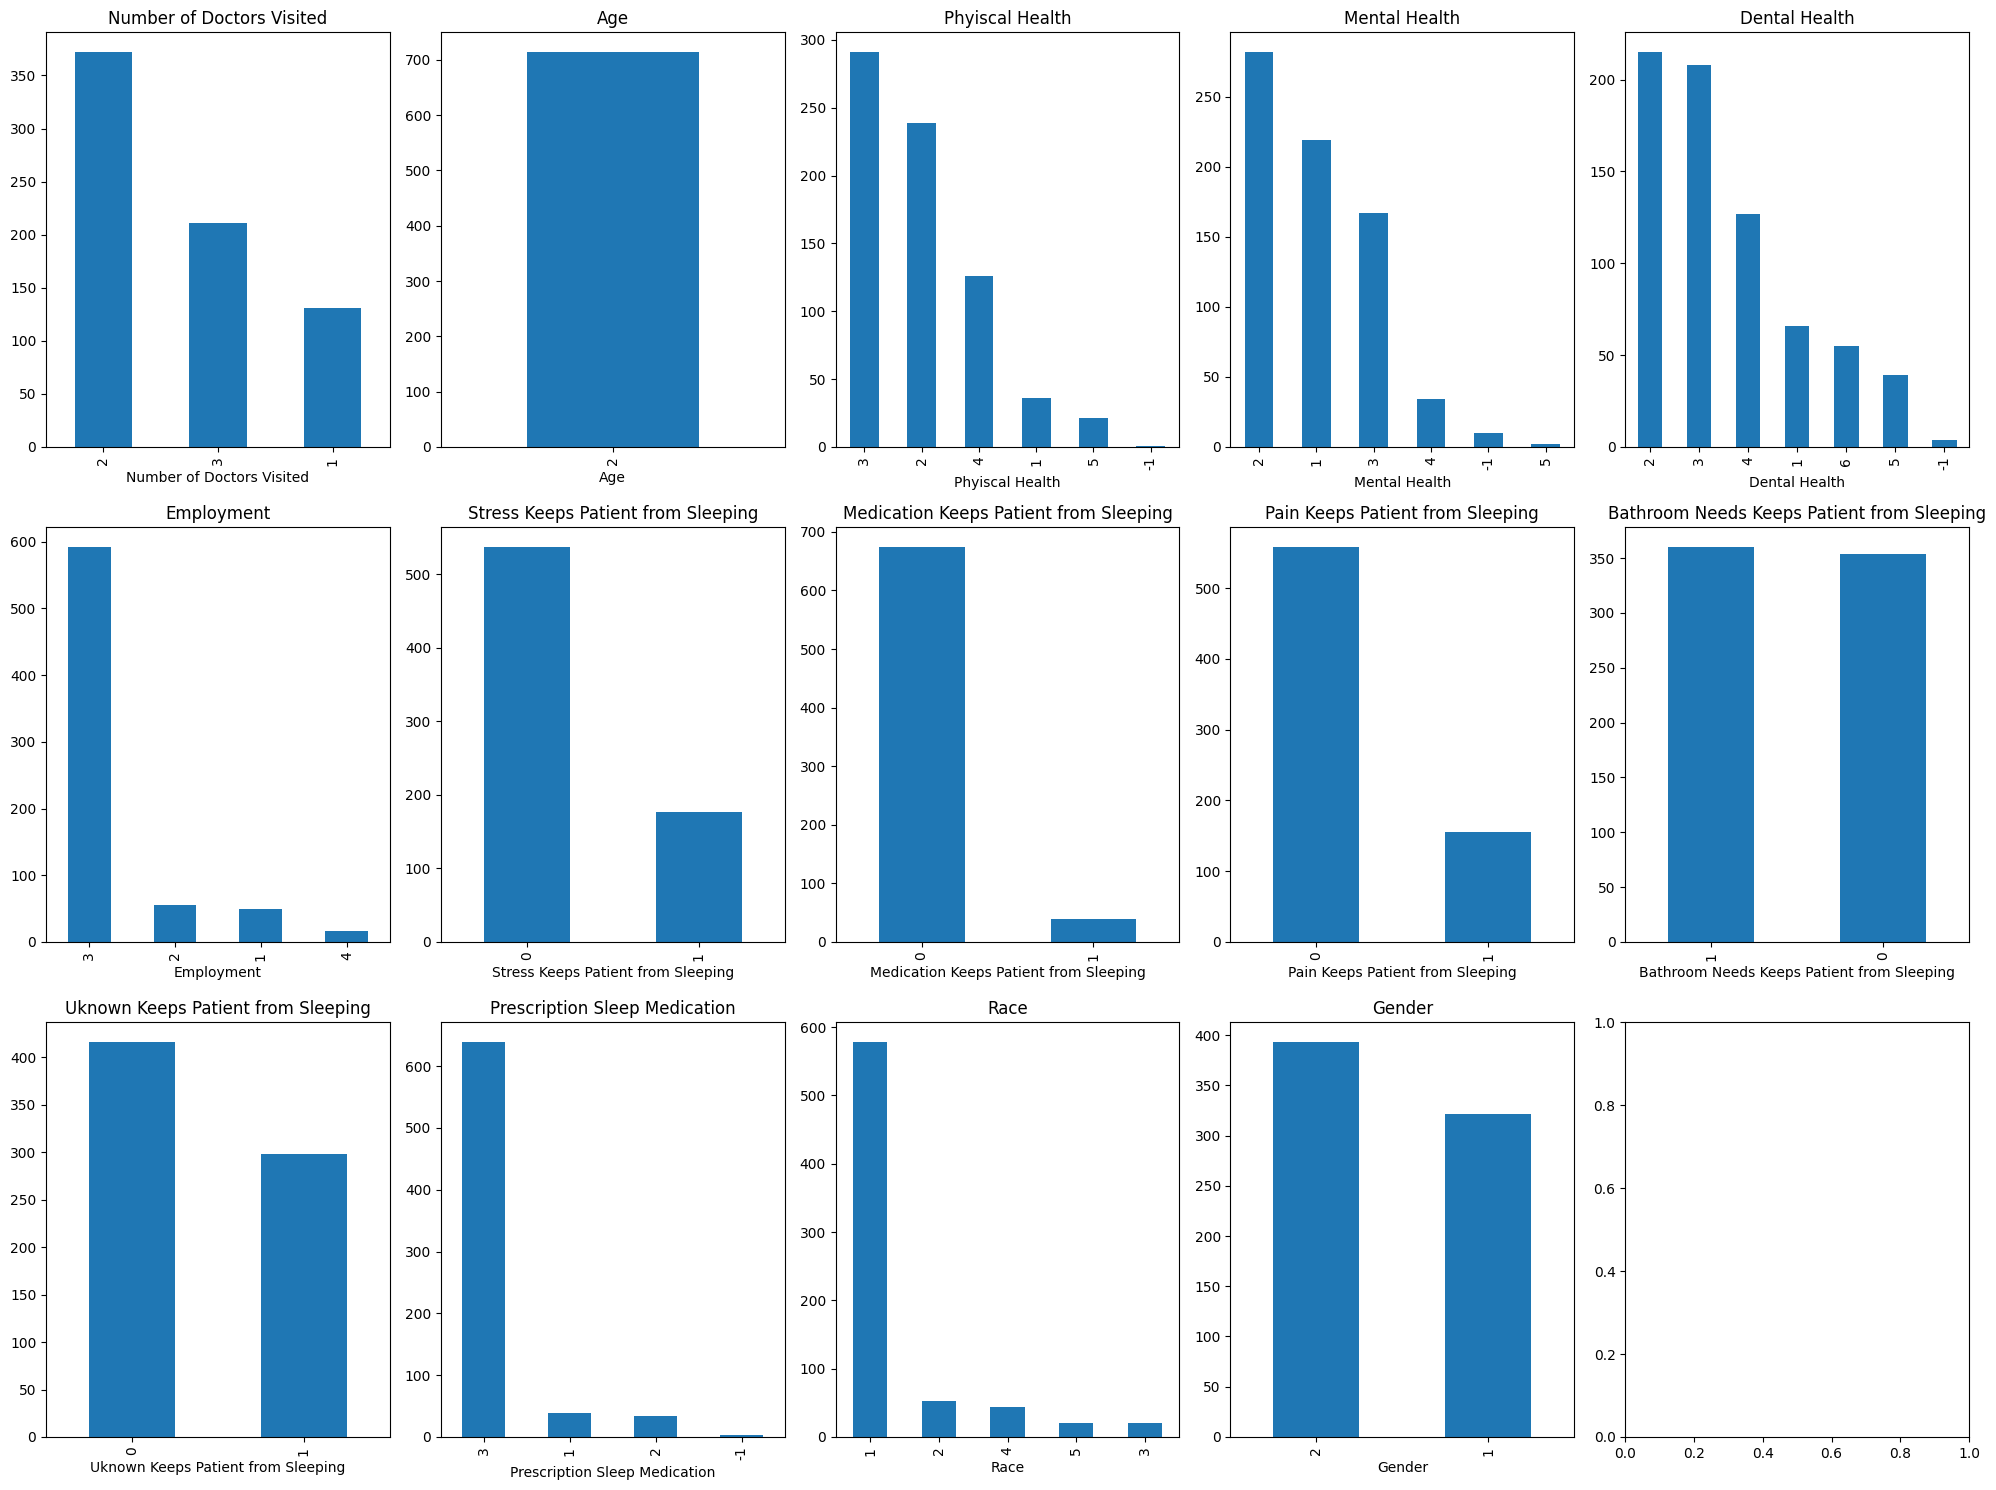

In [ ]:
# visualizing the distribution of the features
fig, axes = plt.subplots(3, 5, figsize=(20, 15))
axes = axes.ravel()

for i, column in enumerate(df.columns):
    df[column].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

In [ ]:
df['Number of Doctors Visited'].describe()

,Number of Doctors Visited
count,714.000000
mean,2.112045
std,0.683441
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [ ]:
df['Age'].describe()

,Age
count,714.0
mean,2.0
std,0.0
min,2.0
25%,2.0
50%,2.0
75%,2.0
max,2.0


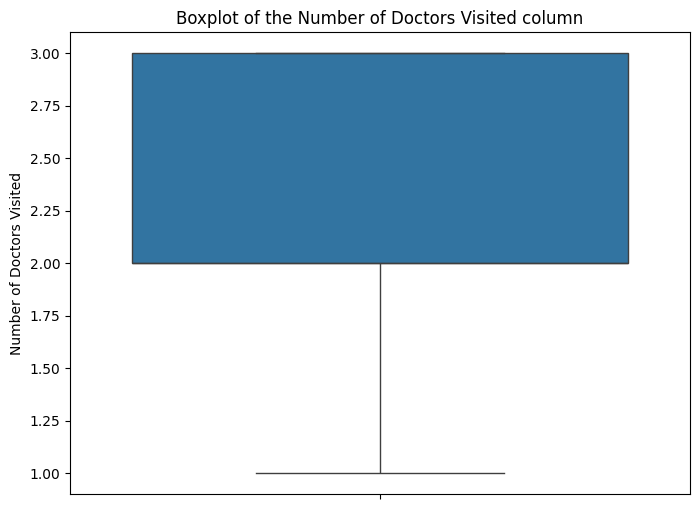

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='Number of Doctors Visited', data=df)
plt.title("Boxplot of the Number of Doctors Visited column")
plt.show()

In [ ]:
Q1_UP = df['Number of Doctors Visited'].quantile(0.25)
Q2_UP = df['Number of Doctors Visited'].quantile(0.5)
Q3_UP = df['Number of Doctors Visited'].quantile(0.75)

lower_limit_UP = Q1_UP - 1.5 * (Q3_UP - Q1_UP)
upper_limit_UP = Q3_UP + 1.5 * (Q3_UP - Q1_UP)

print(f"Feature: Number of Doctors Visited")
print(f"- Q1: {Q1_UP:.2f}")
print(f"- Q2 (Mediana): {Q2_UP:.2f}")
print(f"- Q3: {Q3_UP:.2f}")
print(f"- Limite Inferior: {lower_limit_UP:.2f}")
print(f"- Limite Superior: {upper_limit_UP:.2f}")

Feature: Number of Doctors Visited
- Q1: 2.00
- Q2 (Mediana): 2.00
- Q3: 3.00
- Limite Inferior: 0.50
- Limite Superior: 4.50


Existe um viés na Classe 2. Portanto seria bom utilizar tecnica de  subamostragem para a classe super-representada.

In [ ]:
# Calculate the class distribution
class_distribution = df['Number of Doctors Visited'].value_counts()
print(class_distribution)

Number of Doctors Visited
2    372
3    211
1    131
Name: count, dtype: int64


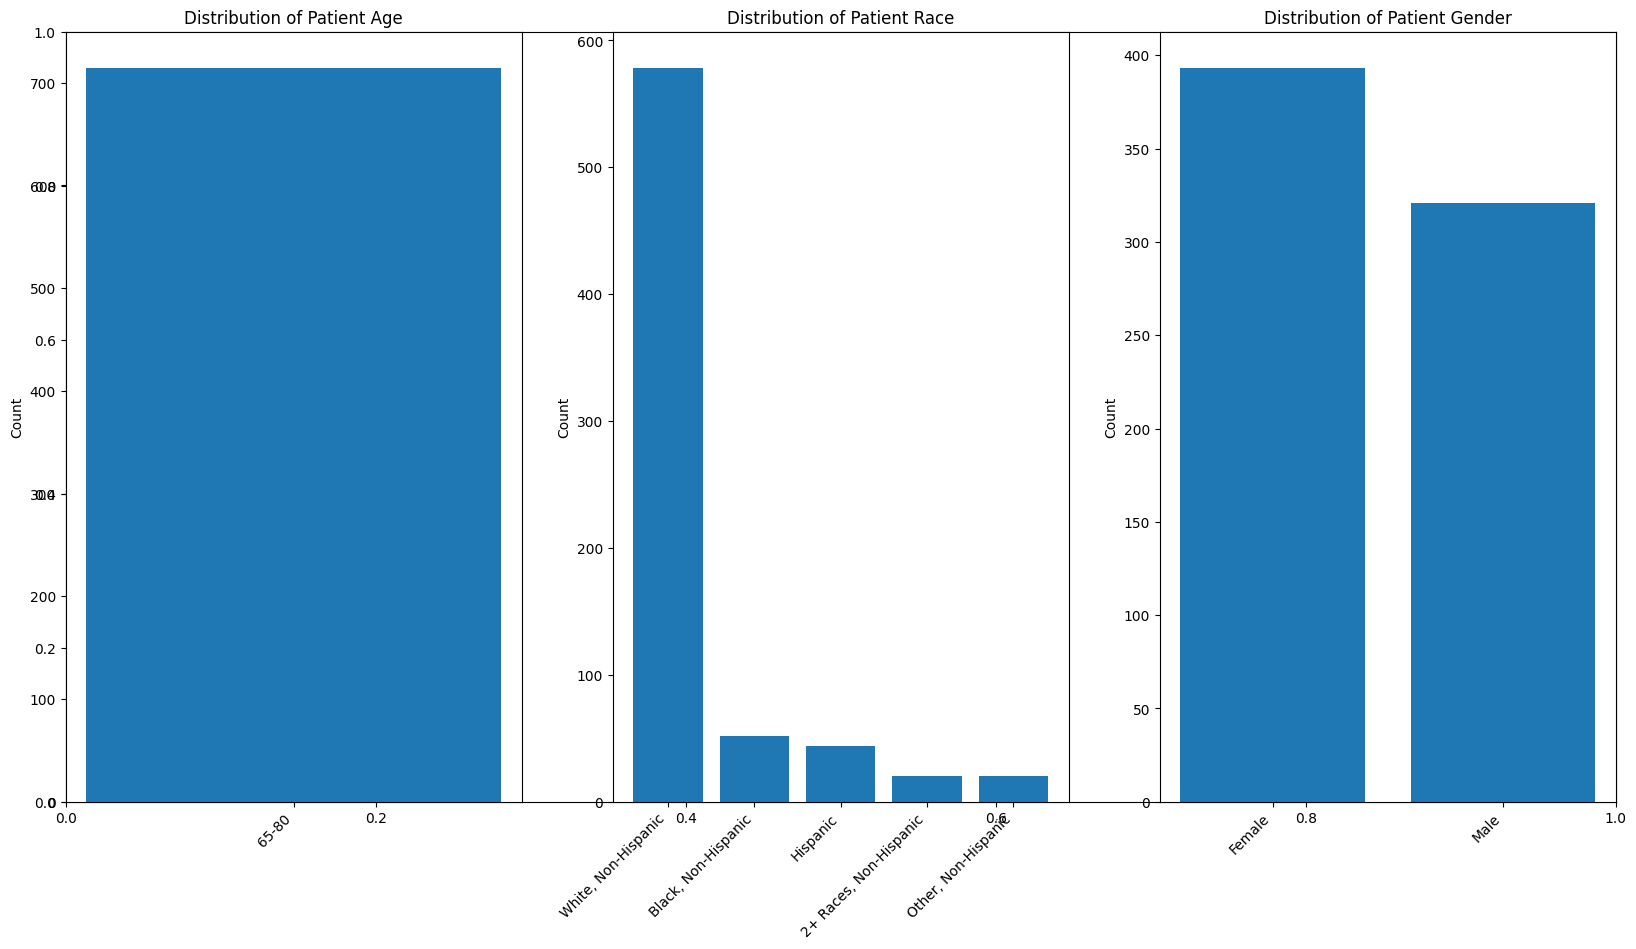

In [ ]:
df_ = df.copy()

age_dict = { 1: "50-64", 2: "65-80" }
df_['Age'] = df_['Age'].map(age_dict)

race_dict = { 1: "White, Non-Hispanic", 2: "Black, Non-Hispanic", 3: "Other, Non-Hispanic", 4: "Hispanic", 5: "2+ Races, Non-Hispanic" }
df_['Race'] = df_['Race'].map(race_dict)

gender_dict = { 1: "Male", 2: "Female" }
df_['Gender'] = df_['Gender'].map(gender_dict)

plt.subplots(figsize=(20, 10))
for i, col in enumerate(['Age', 'Race' , 'Gender']):
    plt.subplot(1, 3, i + 1)

    x = df_[col].value_counts()
    plt.bar(x.index, x.values)
    plt.title('Distribution of Patient ' + col)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Count')

plt.show()

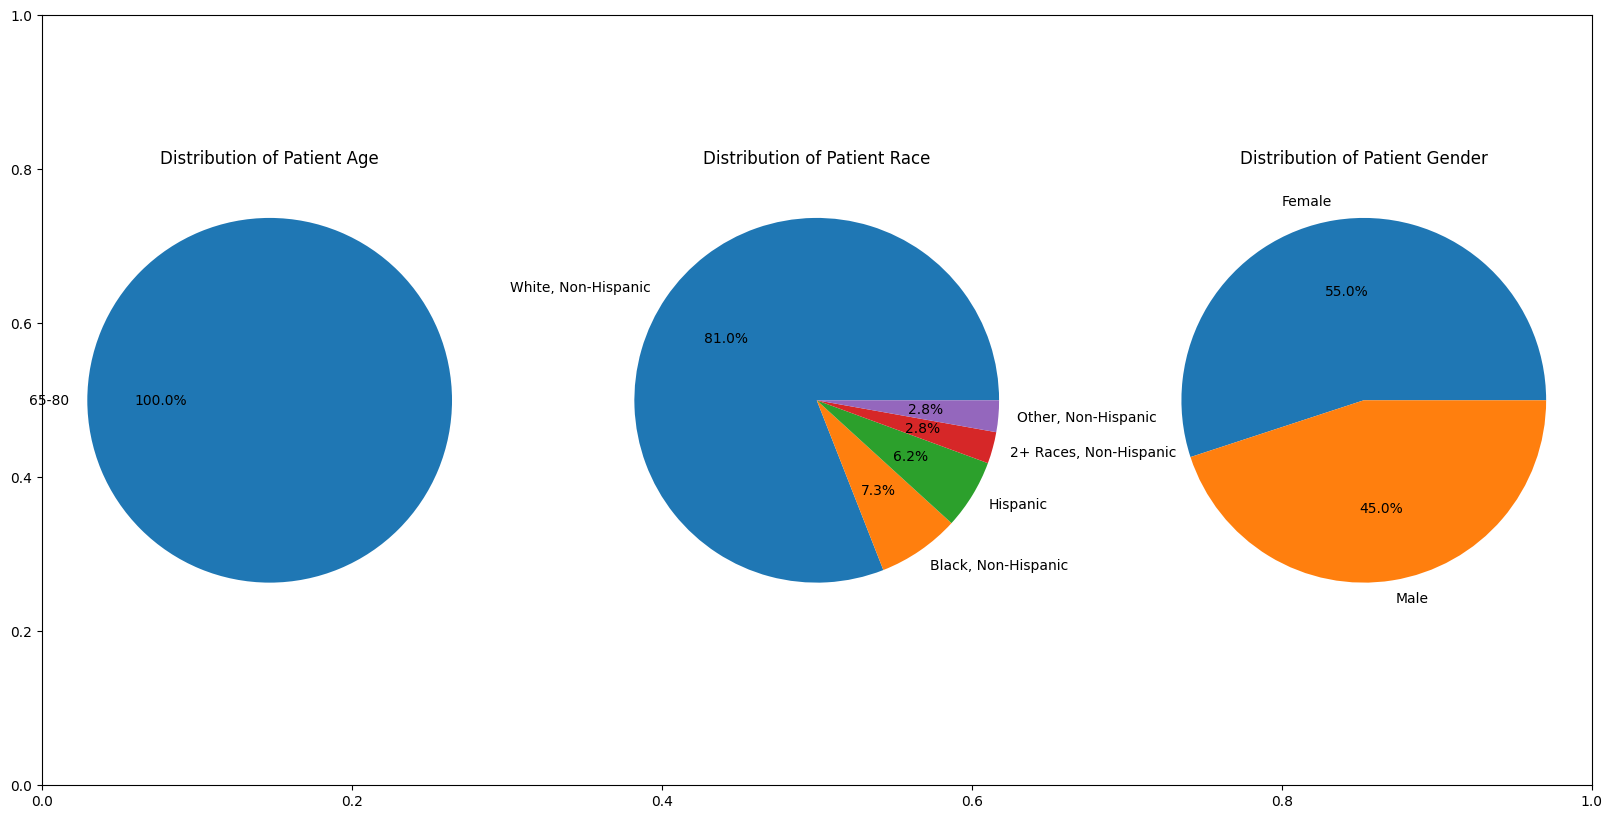

In [ ]:
plt.subplots(figsize=(20, 10))
for i, col in enumerate(['Age', 'Race' , 'Gender']):
    plt.subplot(1, 3, i + 1)

    x = df_[col].value_counts()
    plt.title('Distribution of Patient ' + col)
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')

plt.show()

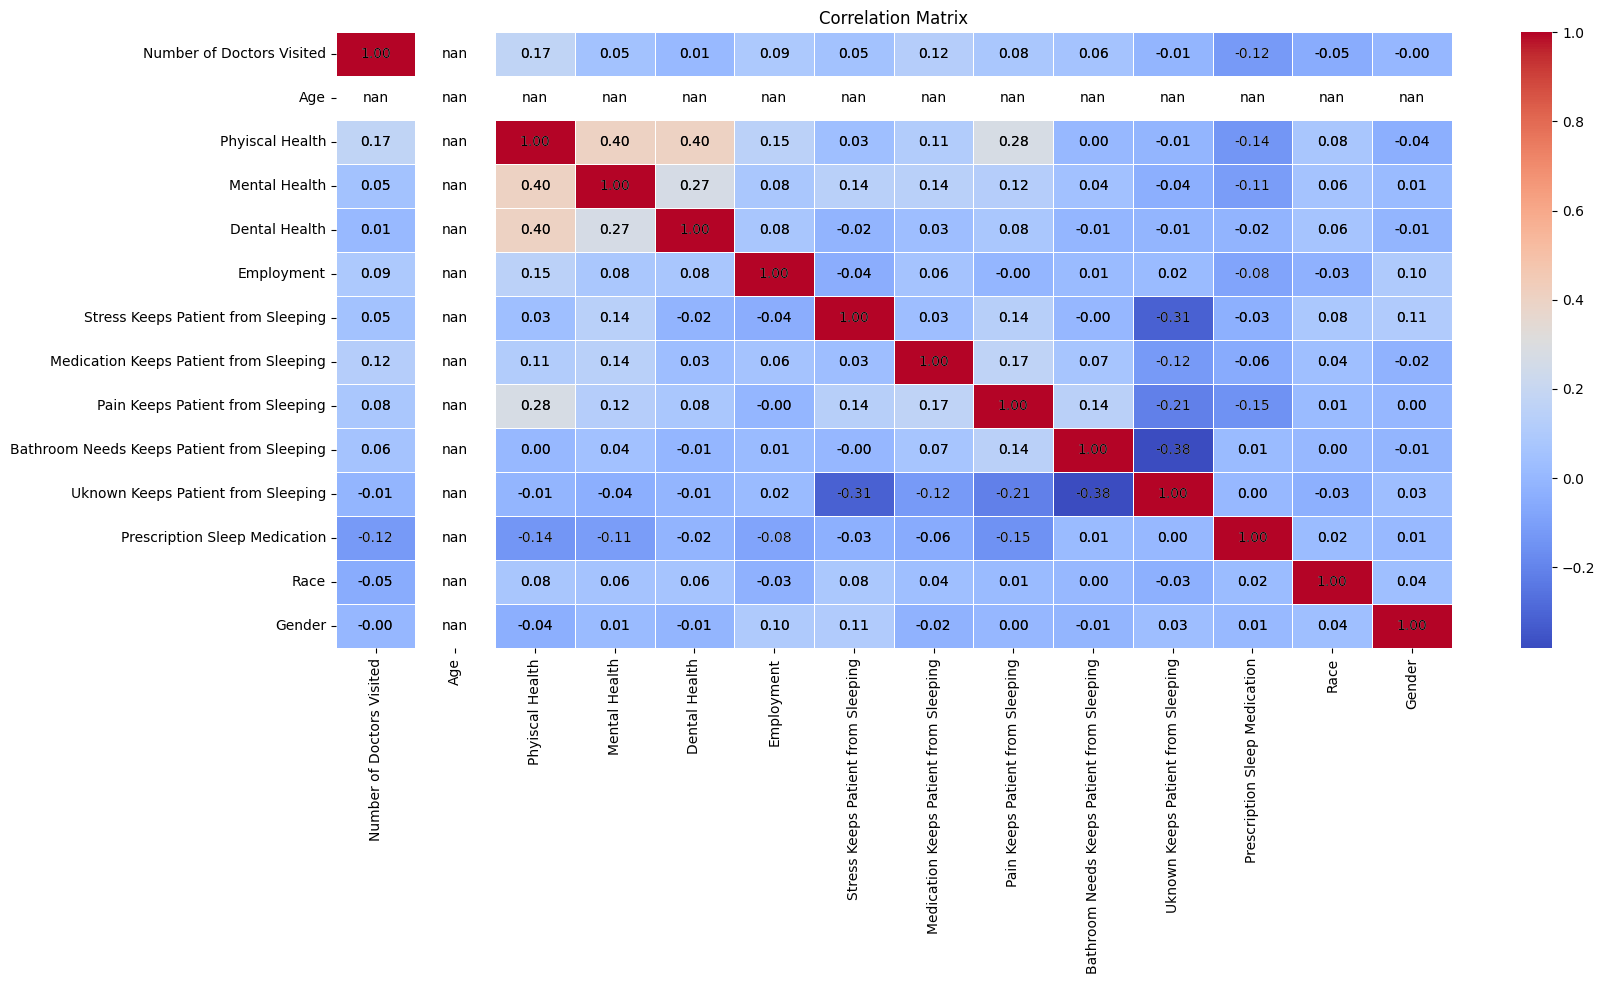

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)

# Add annotations to the heatmap
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        text = f"{corr_matrix.iloc[i, j]:.2f}"
        plt.text(j + 0.5, i + 0.5, text, ha='center', va='center', color='black')

plt.title("Correlation Matrix")
plt.show()

Fazendo One-Hote-Encoding em todas as features por serem categoricas

In [ ]:
categorical_features = df.columns.tolist()
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=False)
df_encoded

,Number of Doctors Visited_1,Number of Doctors Visited_2,Number of Doctors Visited_3,Age_2,Phyiscal Health_-1,Phyiscal Health_1,Phyiscal Health_2,Phyiscal Health_3,Phyiscal Health_4,Phyiscal Health_5,...,Prescription Sleep Medication_1,Prescription Sleep Medication_2,Prescription Sleep Medication_3,Race_1,Race_2,Race_3,Race_4,Race_5,Gender_1,Gender_2
0,False,False,True,True,False,False,False,False,True,False,...,False,False,True,True,False,False,False,False,False,True
1,False,True,False,True,False,False,False,False,True,False,...,False,False,True,True,False,False,False,False,True,False
2,False,False,True,True,False,False,False,True,False,False,...,False,False,True,False,False,False,True,False,True,False
3,True,False,False,True,False,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,True
4,False,False,True,True,False,False,False,True,False,False,...,False,False,True,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,False,True,False,True,False,False,True,False,False,False,...,False,False,True,True,False,False,False,False,True,False
710,False,False,True,True,False,False,True,False,False,False,...,False,False,True,True,False,False,False,False,False,True
711,False,False,True,True,False,False,False,False,True,False,...,False,False,True,True,False,False,False,False,True,False
712,False,False,True,True,False,False,False,True,False,False,...,False,False,True,True,False,False,False,False,False,True


In [ ]:
df_encoded = df_encoded.reset_index(drop=True)

In [ ]:
X = df_encoded.drop(columns=['Number of Doctors Visited_1', 'Number of Doctors Visited_2', 'Number of Doctors Visited_3'])
y = df_encoded[['Number of Doctors Visited_1', 'Number of Doctors Visited_2', 'Number of Doctors Visited_3']]

In [ ]:
X

,Age_2,Phyiscal Health_-1,Phyiscal Health_1,Phyiscal Health_2,Phyiscal Health_3,Phyiscal Health_4,Phyiscal Health_5,Mental Health_-1,Mental Health_1,Mental Health_2,...,Prescription Sleep Medication_1,Prescription Sleep Medication_2,Prescription Sleep Medication_3,Race_1,Race_2,Race_3,Race_4,Race_5,Gender_1,Gender_2
0,True,False,False,False,False,True,False,False,False,False,...,False,False,True,True,False,False,False,False,False,True
1,True,False,False,False,False,True,False,False,False,True,...,False,False,True,True,False,False,False,False,True,False
2,True,False,False,False,True,False,False,False,False,True,...,False,False,True,False,False,False,True,False,True,False
3,True,False,False,False,True,False,False,False,False,True,...,False,False,True,False,False,False,True,False,False,True
4,True,False,False,False,True,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,True,False,False,True,False,False,False,False,False,True,...,False,False,True,True,False,False,False,False,True,False
710,True,False,False,True,False,False,False,False,False,True,...,False,False,True,True,False,False,False,False,False,True
711,True,False,False,False,False,True,False,False,False,True,...,False,False,True,True,False,False,False,False,True,False
712,True,False,False,False,True,False,False,False,True,False,...,False,False,True,True,False,False,False,False,False,True


In [ ]:
y

,Number of Doctors Visited_1,Number of Doctors Visited_2,Number of Doctors Visited_3
0,False,False,True
1,False,True,False
2,False,False,True
3,True,False,False
4,False,False,True
...,...,...,...
709,False,True,False
710,False,False,True
711,False,False,True
712,False,False,True


In [ ]:
# feature_importances = pd.DataFrame(model.feature_importances_,
#                                    index = X.columns,
#                                    columns=['importance']).sort_values('importance', ascending=False)

# # Plotting
# plt.figure(figsize=(10, 6))
# feature_importances.plot(kind='barh')

<Axes: title={'center': 'Number of Doctors Visited'}, ylabel='count'>

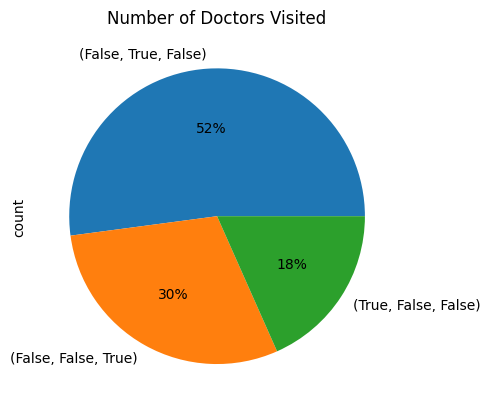

In [ ]:
y.value_counts().plot(kind='pie', autopct='%1.0f%%', title='Number of Doctors Visited')

In [ ]:
# nm = NearMiss(version = 3, n_neighbors = 3, n_neighbors_ver3 = 3)

# X_resampled, y_resampled = nm.fit_resample(X.values, y.values)

In [ ]:
X_resampled = X.values
y_resampled = y.values

In [ ]:
y_resampled = np.argmax(y_resampled, axis=1)

y_resampled = pd.Series(y_resampled)
class_distribution_resampled = y_resampled.value_counts()
print("Class distribution after NearMiss undersampling:")
print(class_distribution_resampled)

Class distribution after NearMiss undersampling:
1    372
2    211
0    131
Name: count, dtype: int64


<Axes: title={'center': 'Number of Doctors Visited'}, ylabel='count'>

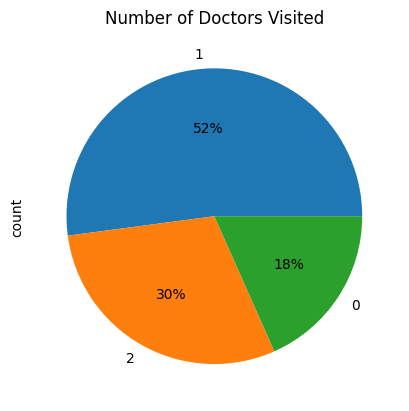

In [ ]:
y_resampled.value_counts().plot(kind='pie', autopct='%1.0f%%', title='Number of Doctors Visited')

In [ ]:
df = pd.DataFrame(X_resampled, columns=X.columns)

In [ ]:
df_encoded.shape

(714, 48)

In [ ]:
df

,Age_2,Phyiscal Health_-1,Phyiscal Health_1,Phyiscal Health_2,Phyiscal Health_3,Phyiscal Health_4,Phyiscal Health_5,Mental Health_-1,Mental Health_1,Mental Health_2,...,Prescription Sleep Medication_1,Prescription Sleep Medication_2,Prescription Sleep Medication_3,Race_1,Race_2,Race_3,Race_4,Race_5,Gender_1,Gender_2
0,True,False,False,False,False,True,False,False,False,False,...,False,False,True,True,False,False,False,False,False,True
1,True,False,False,False,False,True,False,False,False,True,...,False,False,True,True,False,False,False,False,True,False
2,True,False,False,False,True,False,False,False,False,True,...,False,False,True,False,False,False,True,False,True,False
3,True,False,False,False,True,False,False,False,False,True,...,False,False,True,False,False,False,True,False,False,True
4,True,False,False,False,True,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,True,False,False,True,False,False,False,False,False,True,...,False,False,True,True,False,False,False,False,True,False
710,True,False,False,True,False,False,False,False,False,True,...,False,False,True,True,False,False,False,False,False,True
711,True,False,False,False,False,True,False,False,False,True,...,False,False,True,True,False,False,False,False,True,False
712,True,False,False,False,True,False,False,False,True,False,...,False,False,True,True,False,False,False,False,False,True


In [ ]:
x = df

In [ ]:
x

,Age_2,Phyiscal Health_-1,Phyiscal Health_1,Phyiscal Health_2,Phyiscal Health_3,Phyiscal Health_4,Phyiscal Health_5,Mental Health_-1,Mental Health_1,Mental Health_2,...,Prescription Sleep Medication_1,Prescription Sleep Medication_2,Prescription Sleep Medication_3,Race_1,Race_2,Race_3,Race_4,Race_5,Gender_1,Gender_2
0,True,False,False,False,False,True,False,False,False,False,...,False,False,True,True,False,False,False,False,False,True
1,True,False,False,False,False,True,False,False,False,True,...,False,False,True,True,False,False,False,False,True,False
2,True,False,False,False,True,False,False,False,False,True,...,False,False,True,False,False,False,True,False,True,False
3,True,False,False,False,True,False,False,False,False,True,...,False,False,True,False,False,False,True,False,False,True
4,True,False,False,False,True,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,True,False,False,True,False,False,False,False,False,True,...,False,False,True,True,False,False,False,False,True,False
710,True,False,False,True,False,False,False,False,False,True,...,False,False,True,True,False,False,False,False,False,True
711,True,False,False,False,False,True,False,False,False,True,...,False,False,True,True,False,False,False,False,True,False
712,True,False,False,False,True,False,False,False,True,False,...,False,False,True,True,False,False,False,False,False,True


In [ ]:
x = x.values

In [ ]:
x

array([[ True, False, False, ..., False, False,  True],
       [ True, False, False, ..., False,  True, False],
       [ True, False, False, ..., False,  True, False],
       ...,
       [ True, False, False, ..., False,  True, False],
       [ True, False, False, ..., False, False,  True],
       [ True, False, False, ..., False,  True, False]])

In [ ]:
param_grid_KNN = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'cosine']
}

In [ ]:
param_grid_DT = {
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}

In [ ]:
param_grid_RF = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50]
}

In [ ]:
param_grid_SVM = {
    'C': [0.1, 1, 10, 100, 500],
    'kernel': ['rbf', 'poly']
}

In [ ]:
param_grid_MLP = {
    'hidden_layer_sizes': [(100, 50, 25)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.001],
    'batch_size': ['auto'],
    'learning_rate_init': [0.001],
    'max_iter': [500],
    'early_stopping': [True],
    'random_state': [42]
}

In [ ]:
param_grid_LR = {
    'C': [0.1, 1, 10]
}

In [ ]:
param_grid_XGB = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 40, 70, 100],
}

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
S = MinMaxScaler()

In [ ]:
test_scores_KNN = []
acc_test_scores_KNN = []
precision_test_scores_KNN = []
recall_test_scores_KNN = []
f1_test_scores_KNN = []

test_scores_DT = []
acc_test_scores_DT = []
precision_test_scores_DT = []
recall_test_scores_DT = []
f1_test_scores_DT = []

test_scores_RF = []
acc_test_scores_RF = []
precision_test_scores_RF = []
recall_test_scores_RF = []
f1_test_scores_RF = []

test_scores_SVM = []
acc_test_scores_SVM = []
precision_test_scores_SVM = []
recall_test_scores_SVM = []
f1_test_scores_SVM = []

test_scores_MLP = []
acc_test_scores_MLP = []
precision_test_scores_MLP = []
recall_test_scores_MLP = []
f1_test_scores_MLP = []

test_scores_LR = []
acc_test_scores_LR = []
precision_test_scores_LR = []
recall_test_scores_LR = []
f1_test_scores_LR = []

test_scores_XGB = []
acc_test_scores_XGB = []
precision_test_scores_XGB = []
recall_test_scores_XGB = []
f1_test_scores_XGB = []

In [ ]:
confusion_matrices_KNN = []
confusion_matrices_DT = []
confusion_matrices_RF = []
confusion_matrices_SVM = []
confusion_matrices_MLP = []
confusion_matrices_LR = []
confusion_matrices_XGB = []

In [ ]:
# função de seleção f1_macro na validação interna
def validation_metric(y_true, y_pred):
    return f1_score(y_true, y_pred, average='macro')

In [ ]:
for i, (train_index, test_index) in enumerate(kfold.split(x)):
    x_train, x_test = X_resampled[train_index], X_resampled[test_index]
    y_train, y_test = y_resampled[train_index], y_resampled[test_index]

    x_train_D, x_val, y_train_D, y_val = train_test_split(x_train, y_train, test_size=0.2)

    params_KNN = []
    f1_val_KNN = []

    params_DT = []
    f1_val_DT = []

    params_RF = []
    f1_val_RF = []

    params_SVM = []
    f1_val_SVM = []

    params_MLP = []
    f1_val_MLP = []

    params_LR = []
    f1_val_LR = []

    params_XGB = []
    f1_val_XGB = []

    x_train_S = S.fit_transform(x_train)
    x_test_S = S.transform(x_test)


    x_train_D_S = S.fit_transform(x_train_D)
    x_val_S = S.transform(x_val)


    for params in ParameterGrid(param_grid_KNN):
        knn = KNeighborsClassifier(n_neighbors=params['n_neighbors'], metric=params['metric'])
        knn.fit(x_train_D_S, y_train_D)
        y_pred = knn.predict(x_val_S)
        acc = accuracy_score(y_val, y_pred)
        params_KNN.append(params)
        f1_val_KNN.append(validation_metric(y_val, y_pred))

    for params in ParameterGrid(param_grid_DT):
        dt = DecisionTreeClassifier(max_depth=params['max_depth'], random_state=42)
        dt.fit(x_train_D_S, y_train_D)
        y_pred = dt.predict(x_val_S)
        acc = accuracy_score(y_val, y_pred)
        params_DT.append(params)
        f1_val_DT.append(validation_metric(y_val, y_pred))

    for params in ParameterGrid(param_grid_RF):
        rf = RandomForestClassifier(n_estimators=params['n_estimators'], max_depth=params['max_depth'], random_state=42)
        rf.fit(x_train_D_S, y_train_D)
        y_pred = rf.predict(x_val_S)
        acc = accuracy_score(y_val, y_pred)
        params_RF.append(params)
        f1_val_RF.append(validation_metric(y_val, y_pred))

    for params in ParameterGrid(param_grid_SVM):
        svm = SupportVectorMachineClassifier(C=params['C'], kernel=params['kernel'], random_state=42)
        svm.fit(x_train_D_S, y_train_D)
        y_pred = svm.predict(x_val_S)
        acc = accuracy_score(y_val, y_pred)
        params_SVM.append(params)
        f1_val_SVM.append(validation_metric(y_val, y_pred))

    for params in ParameterGrid(param_grid_MLP):

      mlp = MLPClassifier(
          hidden_layer_sizes=params['hidden_layer_sizes'],
          alpha=params['alpha'],
          learning_rate_init=params['learning_rate_init'],
          activation=params['activation'],
          solver=params['solver'],
          max_iter=params['max_iter'],
          early_stopping=params['early_stopping'],
          random_state=params['random_state']
      )

      mlp.fit(x_train_D_S, y_train_D)
      y_pred = mlp.predict(x_val_S)
      acc = accuracy_score(y_val, y_pred)
      params_MLP.append(params)
      f1_val_MLP.append(validation_metric(y_val, y_pred))

    for params in ParameterGrid(param_grid_LR):
      lr = LogisticRegression(C=params['C'], multi_class='multinomial', solver='saga', max_iter=1000, random_state=42)
      lr.fit(x_train_D_S, y_train_D)
      y_pred = lr.predict(x_val_S)
      acc = accuracy_score(y_val, y_pred)
      params_LR.append(params)
      f1_val_LR.append(validation_metric(y_val, y_pred))

    for params in ParameterGrid(param_grid_XGB):
      xgb = XGBClassifier(n_estimators=params['n_estimators'], max_depth=params['max_depth'], random_state=42)
      xgb.fit(x_train_D_S, y_train_D)
      y_pred = xgb.predict(x_val_S)
      acc = accuracy_score(y_val, y_pred)
      params_XGB.append(params)
      f1_val_XGB.append(validation_metric(y_val, y_pred))


    print(f"Fold {i+1}:")

    best_params_KNN = params_KNN[f1_val_KNN.index(max(f1_val_KNN))]
    best_params_DT  = params_DT[f1_val_DT.index(max(f1_val_DT))]
    best_params_RF  = params_RF[f1_val_RF.index(max(f1_val_RF))]
    best_params_SVM = params_SVM[f1_val_SVM.index(max(f1_val_SVM))]
    best_params_MLP = params_MLP[f1_val_MLP.index(max(f1_val_MLP))]
    best_params_LR  = params_LR[f1_val_LR.index(max(f1_val_LR))]
    best_params_XGB = params_XGB[f1_val_XGB.index(max(f1_val_XGB))]


    knn = KNeighborsClassifier(n_neighbors=best_params_KNN['n_neighbors'], metric=best_params_KNN['metric'])
    knn.fit(x_train_S, y_train)
    y_pred_knn = knn.predict(x_test_S)
    knn_acc = accuracy_score(y_test, y_pred_knn)
    knn_precision = precision_score(y_test, y_pred_knn, average='weighted')
    knn_recall = recall_score(y_test, y_pred_knn, average='weighted')
    knn_f1 = f1_score(y_test, y_pred_knn, average='weighted')

    cm_knn = confusion_matrix(y_test, y_pred_knn)
    confusion_matrices_KNN.append(cm_knn)

    acc_test_scores_KNN.append(knn_acc)
    precision_test_scores_KNN.append(knn_precision)
    recall_test_scores_KNN.append(knn_recall)
    f1_test_scores_KNN.append(knn_f1)

    print(f"\tKNeighborsClassifier:")
    print(f"\t- Melhor n_neighbors: {best_params_KNN['n_neighbors']}")
    print(f"\t- acuracia do teste: {knn_acc:.2f}")
    print(f"\t- Precision no teste: {knn_precision:.4f}")
    print(f"\t- Recall no teste: {knn_recall:.4f}")
    print(f"\t- F1 no teste: {knn_f1:.4f}")

    dt = DecisionTreeClassifier(max_depth=best_params_DT['max_depth'], random_state=42)
    dt.fit(x_train_S, y_train)
    y_pred_dt = dt.predict(x_test_S)
    dt_acc = accuracy_score(y_test, y_pred_dt)
    dt_precision = precision_score(y_test, y_pred_dt, average='weighted')
    dt_recall = recall_score(y_test, y_pred_dt, average='weighted')
    dt_f1 = f1_score(y_test, y_pred_dt, average='weighted')

    cm_dt = confusion_matrix(y_test, y_pred_dt)
    confusion_matrices_DT.append(cm_dt)

    acc_test_scores_DT.append(dt_acc)
    precision_test_scores_DT.append(dt_precision)
    recall_test_scores_DT.append(dt_recall)
    f1_test_scores_DT.append(dt_f1)

    print(f"\n\tDecisionTreeClassifier:")
    print(f"\t- Melhor max_depth: {best_params_DT['max_depth']}")
    print(f"\t- acuracia do teste: {dt_acc:.2f}")
    print(f"\t- Precision no teste: {dt_precision:.4f}")
    print(f"\t- Recall no teste: {dt_recall:.4f}")
    print(f"\t- F1 no teste: {dt_f1:.4f}")

    rf = RandomForestClassifier(n_estimators=best_params_RF['n_estimators'], max_depth=best_params_RF['max_depth'], random_state=42)
    rf.fit(x_train_S, y_train)
    y_pred_rf = rf.predict(x_test_S)
    rf_acc = accuracy_score(y_test, y_pred_rf)
    rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
    rf_recall = recall_score(y_test, y_pred_rf, average='weighted')
    rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

    cm_rf = confusion_matrix(y_test, y_pred_rf)
    confusion_matrices_RF.append(cm_rf)

    acc_test_scores_RF.append(rf_acc)
    precision_test_scores_RF.append(rf_precision)
    recall_test_scores_RF.append(rf_recall)
    f1_test_scores_RF.append(rf_f1)

    print(f"\n\tRandomForestClassifier:")
    print(f"\t- Melhor n_estimators: {best_params_RF['n_estimators']}")
    print(f"\t- Melhor max_depth: {best_params_RF['max_depth']}")
    print(f"\t- acuracia do teste: {rf_acc:.2f}")
    print(f"\t- Precision no teste: {rf_precision:.4f}")
    print(f"\t- Recall no teste: {rf_recall:.4f}")
    print(f"\t- F1 no teste: {rf_f1:.4f}")

    svm.fit(x_train_S, y_train)
    y_pred_svm = svm.predict(x_test_S)
    svm_acc = accuracy_score(y_test, y_pred_svm)
    svm_precision = precision_score(y_test, y_pred_svm, average='weighted')
    svm_recall = recall_score(y_test, y_pred_svm, average='weighted')
    svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')

    cm_svm = confusion_matrix(y_test, y_pred_svm)
    confusion_matrices_SVM.append(cm_svm)

    acc_test_scores_SVM.append(svm_acc)
    precision_test_scores_SVM.append(svm_precision)
    recall_test_scores_SVM.append(svm_recall)
    f1_test_scores_SVM.append(svm_f1)

    print(f"\n\tSVM:")
    print(f"\t- Melhor C: {best_params_SVM['C']}")
    print(f"\t- Melhor kernel: {best_params_SVM['kernel']}")
    print(f"\t- acuracia do teste: {svm_acc:.2f}")
    print(f"\t- Precision no teste: {svm_precision:.4f}")
    print(f"\t- Recall no teste: {svm_recall:.4f}")
    print(f"\t- F1 no teste: {svm_f1:.4f}")

    mlp = MLPClassifier(**best_params_MLP)
    mlp.fit(x_train_S, y_train)
    y_pred_mlp = mlp.predict(x_test_S)
    mlp_acc = accuracy_score(y_test, y_pred_mlp)
    mlp_precision = precision_score(y_test, y_pred_mlp, average='weighted')
    mlp_recall = recall_score(y_test, y_pred_mlp, average='weighted')
    mlp_f1 = f1_score(y_test, y_pred_mlp, average='weighted')

    cm_mlp = confusion_matrix(y_test, y_pred_mlp)
    confusion_matrices_MLP.append(cm_mlp)

    acc_test_scores_MLP.append(mlp_acc)
    precision_test_scores_MLP.append(mlp_precision)
    recall_test_scores_MLP.append(mlp_recall)
    f1_test_scores_MLP.append(mlp_f1)

    print(f"\n\tMLPClassifier:")
    print(f"\t- Melhor hidden_layer_sizes: {best_params_MLP['hidden_layer_sizes']}")
    print(f"\t- Melhor alpha: {best_params_MLP['alpha']}")
    print(f"\t- Melhor learning_rate_init: {best_params_MLP['learning_rate_init']}")
    print(f"\t- Acurácia no teste: {mlp_acc:.4f}")
    print(f"\t- Precision no teste: {mlp_precision:.4f}")
    print(f"\t- Recall no teste: {mlp_recall:.4f}")
    print(f"\t- F1 no teste: {mlp_f1:.4f}")


    lr = LogisticRegression(**best_params_LR)
    lr.fit(x_train_S, y_train)
    y_pred_lr = lr.predict(x_test_S)
    lr_acc = accuracy_score(y_test, y_pred_lr)
    lr_precision = precision_score(y_test, y_pred_lr, average='weighted')
    lr_recall = recall_score(y_test, y_pred_lr, average='weighted')
    lr_f1 = f1_score(y_test, y_pred_lr, average='weighted')

    cm_lr = confusion_matrix(y_test, y_pred_lr)
    confusion_matrices_LR.append(cm_lr)

    acc_test_scores_LR.append(lr_acc)
    precision_test_scores_LR.append(lr_precision)
    recall_test_scores_LR.append(lr_recall)
    f1_test_scores_LR.append(lr_f1)

    print(f"\n\tLogisticRegression:")
    print(f"\t- Melhor C: {best_params_LR['C']}")
    print(f"\t- Acurácia no teste: {lr_acc:.4f}")
    print(f"\t- Precision no teste: {lr_precision:.4f}")
    print(f"\t- Recall no teste: {lr_recall:.4f}")
    print(f"\t- F1 no teste: {lr_f1:.4f}")

    xgb = XGBClassifier(**best_params_XGB)
    xgb.fit(x_train_S, y_train)
    y_pred_xgb = xgb.predict(x_test_S)
    xgb_acc = accuracy_score(y_test, y_pred_xgb)
    xgb_precision = precision_score(y_test, y_pred_xgb, average='weighted')
    xgb_recall = recall_score(y_test, y_pred_xgb, average='weighted')
    xgb_f1 = f1_score(y_test, y_pred_xgb, average='weighted')

    cm_xgb = confusion_matrix(y_test, y_pred_xgb)
    confusion_matrices_XGB.append(cm_xgb)

    acc_test_scores_XGB.append(xgb_acc)
    precision_test_scores_XGB.append(xgb_precision)
    recall_test_scores_XGB.append(xgb_recall)
    f1_test_scores_XGB.append(xgb_f1)

    print(f"\n\tXGBClassifier:")
    print(f"\t- Melhor n_estimators: {best_params_XGB['n_estimators']}")
    print(f"\t- Melhor max_depth: {best_params_XGB['max_depth']}")
    print(f"\t- Acurácia no teste: {xgb_acc:.4f}")
    print(f"\t- Precision no teste: {xgb_precision:.4f}")
    print(f"\t- Recall no teste: {xgb_recall:.4f}")
    print(f"\t- F1 no teste: {xgb_f1:.4f}")

    print("----------------------------------------")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Fold 1:
	KNeighborsClassifier:
	- Melhor n_neighbors: 3
	- acuracia do teste: 0.47
	- Precision no teste: 0.4443
	- Recall no teste: 0.4722
	- F1 no teste: 0.4556

	DecisionTreeClassifier:
	- Melhor max_depth: 20
	- acuracia do teste: 0.40
	- Precision no teste: 0.3882
	- Recall no teste: 0.4028
	- F1 no teste: 0.3946

	RandomForestClassifier:
	- Melhor n_estimators: 100
	- Melhor max_depth: 30
	- acuracia do teste: 0.40
	- Precision no teste: 0.3811
	- Recall no teste: 0.4028
	- F1 no teste: 0.3831

	SVM:
	- Melhor C: 100
	- Melhor kernel: poly
	- acuracia do teste: 0.47
	- Precision no teste: 0.4797
	- Recall no teste: 0.4722
	- F1 no teste: 0.4756


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre


	MLPClassifier:
	- Melhor hidden_layer_sizes: (100, 50, 25)
	- Melhor alpha: 0.001
	- Melhor learning_rate_init: 0.001
	- Acurácia no teste: 0.5417
	- Precision no teste: 0.3876
	- Recall no teste: 0.5417
	- F1 no teste: 0.4362

	LogisticRegression:
	- Melhor C: 10
	- Acurácia no teste: 0.4444
	- Precision no teste: 0.3263
	- Recall no teste: 0.4444
	- F1 no teste: 0.3747

	XGBClassifier:
	- Melhor n_estimators: 100
	- Melhor max_depth: 40
	- Acurácia no teste: 0.4444
	- Precision no teste: 0.4461
	- Recall no teste: 0.4444
	- F1 no teste: 0.4387
----------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Fold 2:
	KNeighborsClassifier:
	- Melhor n_neighbors: 7
	- acuracia do teste: 0.46
	- Precision no teste: 0.4535
	- Recall no teste: 0.4583
	- F1 no teste: 0.4061

	DecisionTreeClassifier:
	- Melhor max_depth: 10
	- acuracia do teste: 0.51
	- Precision no teste: 0.4993
	- Recall no teste: 0.5139
	- F1 no teste: 0.4982

	RandomForestClassifier:
	- Melhor n_estimators: 100
	- Melhor max_depth: 30
	- acuracia do teste: 0.53
	- Precision no teste: 0.4616
	- Recall no teste: 0.5278
	- F1 no teste: 0.4784

	SVM:
	- Melhor C: 1
	- Melhor kernel: poly
	- acuracia do teste: 0.46
	- Precision no teste: 0.4452
	- Recall no teste: 0.4583
	- F1 no teste: 0.4502


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



	MLPClassifier:
	- Melhor hidden_layer_sizes: (100, 50, 25)
	- Melhor alpha: 0.001
	- Melhor learning_rate_init: 0.001
	- Acurácia no teste: 0.4583
	- Precision no teste: 0.2101
	- Recall no teste: 0.4583
	- F1 no teste: 0.2881

	LogisticRegression:
	- Melhor C: 10
	- Acurácia no teste: 0.5417
	- Precision no teste: 0.5656
	- Recall no teste: 0.5417
	- F1 no teste: 0.4984

	XGBClassifier:
	- Melhor n_estimators: 50
	- Melhor max_depth: 40
	- Acurácia no teste: 0.5000
	- Precision no teste: 0.4822
	- Recall no teste: 0.5000
	- F1 no teste: 0.4829
----------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Fold 3:
	KNeighborsClassifier:
	- Melhor n_neighbors: 11
	- acuracia do teste: 0.50
	- Precision no teste: 0.4704
	- Recall no teste: 0.5000
	- F1 no teste: 0.4607

	DecisionTreeClassifier:
	- Melhor max_depth: 30
	- acuracia do teste: 0.39
	- Precision no teste: 0.4202
	- Recall no teste: 0.3889
	- F1 no teste: 0.3998

	RandomForestClassifier:
	- Melhor n_estimators: 300
	- Melhor max_depth: 10
	- acuracia do teste: 0.47
	- Precision no teste: 0.3333
	- Recall no teste: 0.4722
	- F1 no teste: 0.3581

	SVM:
	- Melhor C: 100
	- Melhor kernel: poly
	- acuracia do teste: 0.33
	- Precision no teste: 0.3584
	- Recall no teste: 0.3333
	- F1 no teste: 0.3419

	MLPClassifier:
	- Melhor hidden_layer_sizes: (100, 50, 25)
	- Melhor alpha: 0.001
	- Melhor learning_rate_init: 0.001
	- Acurácia no teste: 0.5417
	- Precision no teste: 0.4659
	- Recall no teste: 0.5417
	- F1 no teste: 0.4361

	LogisticRegression:
	- Melhor C: 1
	- Acurácia no teste: 0.5556
	- Precision no teste: 0.5701
	- Recall no te

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Fold 4:
	KNeighborsClassifier:
	- Melhor n_neighbors: 5
	- acuracia do teste: 0.40
	- Precision no teste: 0.3550
	- Recall no teste: 0.4028
	- F1 no teste: 0.3504

	DecisionTreeClassifier:
	- Melhor max_depth: 20
	- acuracia do teste: 0.31
	- Precision no teste: 0.2950
	- Recall no teste: 0.3056
	- F1 no teste: 0.2964

	RandomForestClassifier:
	- Melhor n_estimators: 200
	- Melhor max_depth: 20
	- acuracia do teste: 0.33
	- Precision no teste: 0.2927
	- Recall no teste: 0.3333
	- F1 no teste: 0.2846

	SVM:
	- Melhor C: 10
	- Melhor kernel: rbf
	- acuracia do teste: 0.28
	- Precision no teste: 0.2748
	- Recall no teste: 0.2778
	- F1 no teste: 0.2695


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



	MLPClassifier:
	- Melhor hidden_layer_sizes: (100, 50, 25)
	- Melhor alpha: 0.001
	- Melhor learning_rate_init: 0.001
	- Acurácia no teste: 0.4028
	- Precision no teste: 0.1622
	- Recall no teste: 0.4028
	- F1 no teste: 0.2313

	LogisticRegression:
	- Melhor C: 0.1
	- Acurácia no teste: 0.3889
	- Precision no teste: 0.2603
	- Recall no teste: 0.3889
	- F1 no teste: 0.2662

	XGBClassifier:
	- Melhor n_estimators: 100
	- Melhor max_depth: 10
	- Acurácia no teste: 0.2361
	- Precision no teste: 0.2038
	- Recall no teste: 0.2361
	- F1 no teste: 0.2126
----------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Fold 5:
	KNeighborsClassifier:
	- Melhor n_neighbors: 5
	- acuracia do teste: 0.41
	- Precision no teste: 0.3466
	- Recall no teste: 0.4085
	- F1 no teste: 0.3693

	DecisionTreeClassifier:
	- Melhor max_depth: 30
	- acuracia do teste: 0.32
	- Precision no teste: 0.3300
	- Recall no teste: 0.3239
	- F1 no teste: 0.3251

	RandomForestClassifier:
	- Melhor n_estimators: 200
	- Melhor max_depth: 30
	- acuracia do teste: 0.41
	- Precision no teste: 0.3819
	- Recall no teste: 0.4085
	- F1 no teste: 0.3908

	SVM:
	- Melhor C: 500
	- Melhor kernel: poly
	- acuracia do teste: 0.35
	- Precision no teste: 0.3590
	- Recall no teste: 0.3521
	- F1 no teste: 0.3552

	MLPClassifier:
	- Melhor hidden_layer_sizes: (100, 50, 25)
	- Melhor alpha: 0.001
	- Melhor learning_rate_init: 0.001
	- Acurácia no teste: 0.5211
	- Precision no teste: 0.3580
	- Recall no teste: 0.5211
	- F1 no teste: 0.3905


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



	LogisticRegression:
	- Melhor C: 10
	- Acurácia no teste: 0.3803
	- Precision no teste: 0.2492
	- Recall no teste: 0.3803
	- F1 no teste: 0.3011

	XGBClassifier:
	- Melhor n_estimators: 200
	- Melhor max_depth: 40
	- Acurácia no teste: 0.4225
	- Precision no teste: 0.4125
	- Recall no teste: 0.4225
	- F1 no teste: 0.4163
----------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Fold 6:
	KNeighborsClassifier:
	- Melhor n_neighbors: 3
	- acuracia do teste: 0.38
	- Precision no teste: 0.5017
	- Recall no teste: 0.3803
	- F1 no teste: 0.4213

	DecisionTreeClassifier:
	- Melhor max_depth: 30
	- acuracia do teste: 0.44
	- Precision no teste: 0.5162
	- Recall no teste: 0.4366
	- F1 no teste: 0.4650

	RandomForestClassifier:
	- Melhor n_estimators: 100
	- Melhor max_depth: 30
	- acuracia do teste: 0.54
	- Precision no teste: 0.5147
	- Recall no teste: 0.5352
	- F1 no teste: 0.5238

	SVM:
	- Melhor C: 10
	- Melhor kernel: poly
	- acuracia do teste: 0.42
	- Precision no teste: 0.4692
	- Recall no teste: 0.4225
	- F1 no teste: 0.4387


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



	MLPClassifier:
	- Melhor hidden_layer_sizes: (100, 50, 25)
	- Melhor alpha: 0.001
	- Melhor learning_rate_init: 0.001
	- Acurácia no teste: 0.6197
	- Precision no teste: 0.5314
	- Recall no teste: 0.6197
	- F1 no teste: 0.5352

	LogisticRegression:
	- Melhor C: 10
	- Acurácia no teste: 0.6197
	- Precision no teste: 0.5620
	- Recall no teste: 0.6197
	- F1 no teste: 0.5616

	XGBClassifier:
	- Melhor n_estimators: 100
	- Melhor max_depth: 40
	- Acurácia no teste: 0.4789
	- Precision no teste: 0.4749
	- Recall no teste: 0.4789
	- F1 no teste: 0.4768
----------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Fold 7:
	KNeighborsClassifier:
	- Melhor n_neighbors: 3
	- acuracia do teste: 0.45
	- Precision no teste: 0.4854
	- Recall no teste: 0.4507
	- F1 no teste: 0.4646

	DecisionTreeClassifier:
	- Melhor max_depth: 10
	- acuracia do teste: 0.39
	- Precision no teste: 0.3997
	- Recall no teste: 0.3944
	- F1 no teste: 0.3950

	RandomForestClassifier:
	- Melhor n_estimators: 200
	- Melhor max_depth: 20
	- acuracia do teste: 0.41
	- Precision no teste: 0.3745
	- Recall no teste: 0.4085
	- F1 no teste: 0.3907

	SVM:
	- Melhor C: 10
	- Melhor kernel: rbf
	- acuracia do teste: 0.41
	- Precision no teste: 0.4671
	- Recall no teste: 0.4085
	- F1 no teste: 0.4271


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



	MLPClassifier:
	- Melhor hidden_layer_sizes: (100, 50, 25)
	- Melhor alpha: 0.001
	- Melhor learning_rate_init: 0.001
	- Acurácia no teste: 0.5634
	- Precision no teste: 0.3174
	- Recall no teste: 0.5634
	- F1 no teste: 0.4060

	LogisticRegression:
	- Melhor C: 1
	- Acurácia no teste: 0.4789
	- Precision no teste: 0.4279
	- Recall no teste: 0.4789
	- F1 no teste: 0.4198

	XGBClassifier:
	- Melhor n_estimators: 50
	- Melhor max_depth: 10
	- Acurácia no teste: 0.4085
	- Precision no teste: 0.4329
	- Recall no teste: 0.4085
	- F1 no teste: 0.4177
----------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Fold 8:
	KNeighborsClassifier:
	- Melhor n_neighbors: 15
	- acuracia do teste: 0.52
	- Precision no teste: 0.4038
	- Recall no teste: 0.5211
	- F1 no teste: 0.4297

	DecisionTreeClassifier:
	- Melhor max_depth: 30
	- acuracia do teste: 0.42
	- Precision no teste: 0.4401
	- Recall no teste: 0.4225
	- F1 no teste: 0.4305


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



	RandomForestClassifier:
	- Melhor n_estimators: 200
	- Melhor max_depth: 10
	- acuracia do teste: 0.48
	- Precision no teste: 0.3174
	- Recall no teste: 0.4789
	- F1 no teste: 0.3719

	SVM:
	- Melhor C: 10
	- Melhor kernel: poly
	- acuracia do teste: 0.41
	- Precision no teste: 0.4196
	- Recall no teste: 0.4085
	- F1 no teste: 0.4132


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



	MLPClassifier:
	- Melhor hidden_layer_sizes: (100, 50, 25)
	- Melhor alpha: 0.001
	- Melhor learning_rate_init: 0.001
	- Acurácia no teste: 0.5493
	- Precision no teste: 0.4231
	- Recall no teste: 0.5493
	- F1 no teste: 0.4291

	LogisticRegression:
	- Melhor C: 10
	- Acurácia no teste: 0.4648
	- Precision no teste: 0.3591
	- Recall no teste: 0.4648
	- F1 no teste: 0.3916

	XGBClassifier:
	- Melhor n_estimators: 200
	- Melhor max_depth: 10
	- Acurácia no teste: 0.4085
	- Precision no teste: 0.3921
	- Recall no teste: 0.4085
	- F1 no teste: 0.3980
----------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Fold 9:
	KNeighborsClassifier:
	- Melhor n_neighbors: 7
	- acuracia do teste: 0.37
	- Precision no teste: 0.3522
	- Recall no teste: 0.3662
	- F1 no teste: 0.3443

	DecisionTreeClassifier:
	- Melhor max_depth: 30
	- acuracia do teste: 0.37
	- Precision no teste: 0.3530
	- Recall no teste: 0.3662
	- F1 no teste: 0.3561

	RandomForestClassifier:
	- Melhor n_estimators: 400
	- Melhor max_depth: 30
	- acuracia do teste: 0.44
	- Precision no teste: 0.3850
	- Recall no teste: 0.4366
	- F1 no teste: 0.3984

	SVM:
	- Melhor C: 10
	- Melhor kernel: rbf
	- acuracia do teste: 0.42
	- Precision no teste: 0.4552
	- Recall no teste: 0.4225
	- F1 no teste: 0.4367


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



	MLPClassifier:
	- Melhor hidden_layer_sizes: (100, 50, 25)
	- Melhor alpha: 0.001
	- Melhor learning_rate_init: 0.001
	- Acurácia no teste: 0.5352
	- Precision no teste: 0.5994
	- Recall no teste: 0.5352
	- F1 no teste: 0.3874

	LogisticRegression:
	- Melhor C: 1
	- Acurácia no teste: 0.5493
	- Precision no teste: 0.5441
	- Recall no teste: 0.5493
	- F1 no teste: 0.4537

	XGBClassifier:
	- Melhor n_estimators: 100
	- Melhor max_depth: 40
	- Acurácia no teste: 0.4789
	- Precision no teste: 0.4493
	- Recall no teste: 0.4789
	- F1 no teste: 0.4576
----------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Fold 10:
	KNeighborsClassifier:
	- Melhor n_neighbors: 9
	- acuracia do teste: 0.46
	- Precision no teste: 0.4242
	- Recall no teste: 0.4648
	- F1 no teste: 0.4172

	DecisionTreeClassifier:
	- Melhor max_depth: 30
	- acuracia do teste: 0.39
	- Precision no teste: 0.3814
	- Recall no teste: 0.3944
	- F1 no teste: 0.3846

	RandomForestClassifier:
	- Melhor n_estimators: 400
	- Melhor max_depth: 20
	- acuracia do teste: 0.46
	- Precision no teste: 0.4452
	- Recall no teste: 0.4648
	- F1 no teste: 0.4455

	SVM:
	- Melhor C: 500
	- Melhor kernel: rbf
	- acuracia do teste: 0.52
	- Precision no teste: 0.5292
	- Recall no teste: 0.5211
	- F1 no teste: 0.5238

	MLPClassifier:
	- Melhor hidden_layer_sizes: (100, 50, 25)
	- Melhor alpha: 0.001
	- Melhor learning_rate_init: 0.001
	- Acurácia no teste: 0.5070
	- Precision no teste: 0.5191
	- Recall no teste: 0.5070
	- F1 no teste: 0.4170

	LogisticRegression:
	- Melhor C: 10
	- Acurácia no teste: 0.4930
	- Precision no teste: 0.4856
	- Recall no te

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



	XGBClassifier:
	- Melhor n_estimators: 100
	- Melhor max_depth: 10
	- Acurácia no teste: 0.4507
	- Precision no teste: 0.4332
	- Recall no teste: 0.4507
	- F1 no teste: 0.4406
----------------------------------------


In [ ]:
print("\n=== RESULTADOS FINAIS - MÉDIA ± DESVIO PADRÃO ===")

algorithms = {
    'KNeighborsClassifier': (acc_test_scores_KNN, f1_test_scores_KNN),
    'DecisionTreeClassifier': (acc_test_scores_DT, f1_test_scores_DT),
    'RandomForestClassifier': (acc_test_scores_RF, f1_test_scores_RF),
    'SVM': (acc_test_scores_SVM, f1_test_scores_SVM),
    'MLPClassifier': (acc_test_scores_MLP, f1_test_scores_MLP),
    'LogisticRegression': (acc_test_scores_LR, f1_test_scores_LR),
    'XGBClassifier': (acc_test_scores_XGB, f1_test_scores_XGB)
}

for name, (acc_scores, f1_scores) in algorithms.items():
    mean_acc = np.mean(acc_scores)
    std_acc = np.std(acc_scores)
    mean_f1 = np.mean(f1_scores)
    std_f1 = np.std(f1_scores)

    print(f"\n{name}:")
    print(f"Acurácia: {mean_acc:.4f} ± {std_acc:.4f}")
    print(f"F1: {mean_f1:.4f} ± {std_f1:.4f}")


=== RESULTADOS FINAIS - MÉDIA ± DESVIO PADRÃO ===

KNeighborsClassifier:
Acurácia: 0.4425 ± 0.0486
F1: 0.4119 ± 0.0421

DecisionTreeClassifier:
Acurácia: 0.3949 ± 0.0553
F1: 0.3945 ± 0.0575

RandomForestClassifier:
Acurácia: 0.4469 ± 0.0585
F1: 0.4025 ± 0.0631

SVM:
Acurácia: 0.4077 ± 0.0675
F1: 0.4132 ± 0.0693

MLPClassifier:
Acurácia: 0.5240 ± 0.0560
F1: 0.3957 ± 0.0794

LogisticRegression:
Acurácia: 0.4916 ± 0.0724
F1: 0.4159 ± 0.0834

XGBClassifier:
Acurácia: 0.4259 ± 0.0698
F1: 0.4152 ± 0.0726


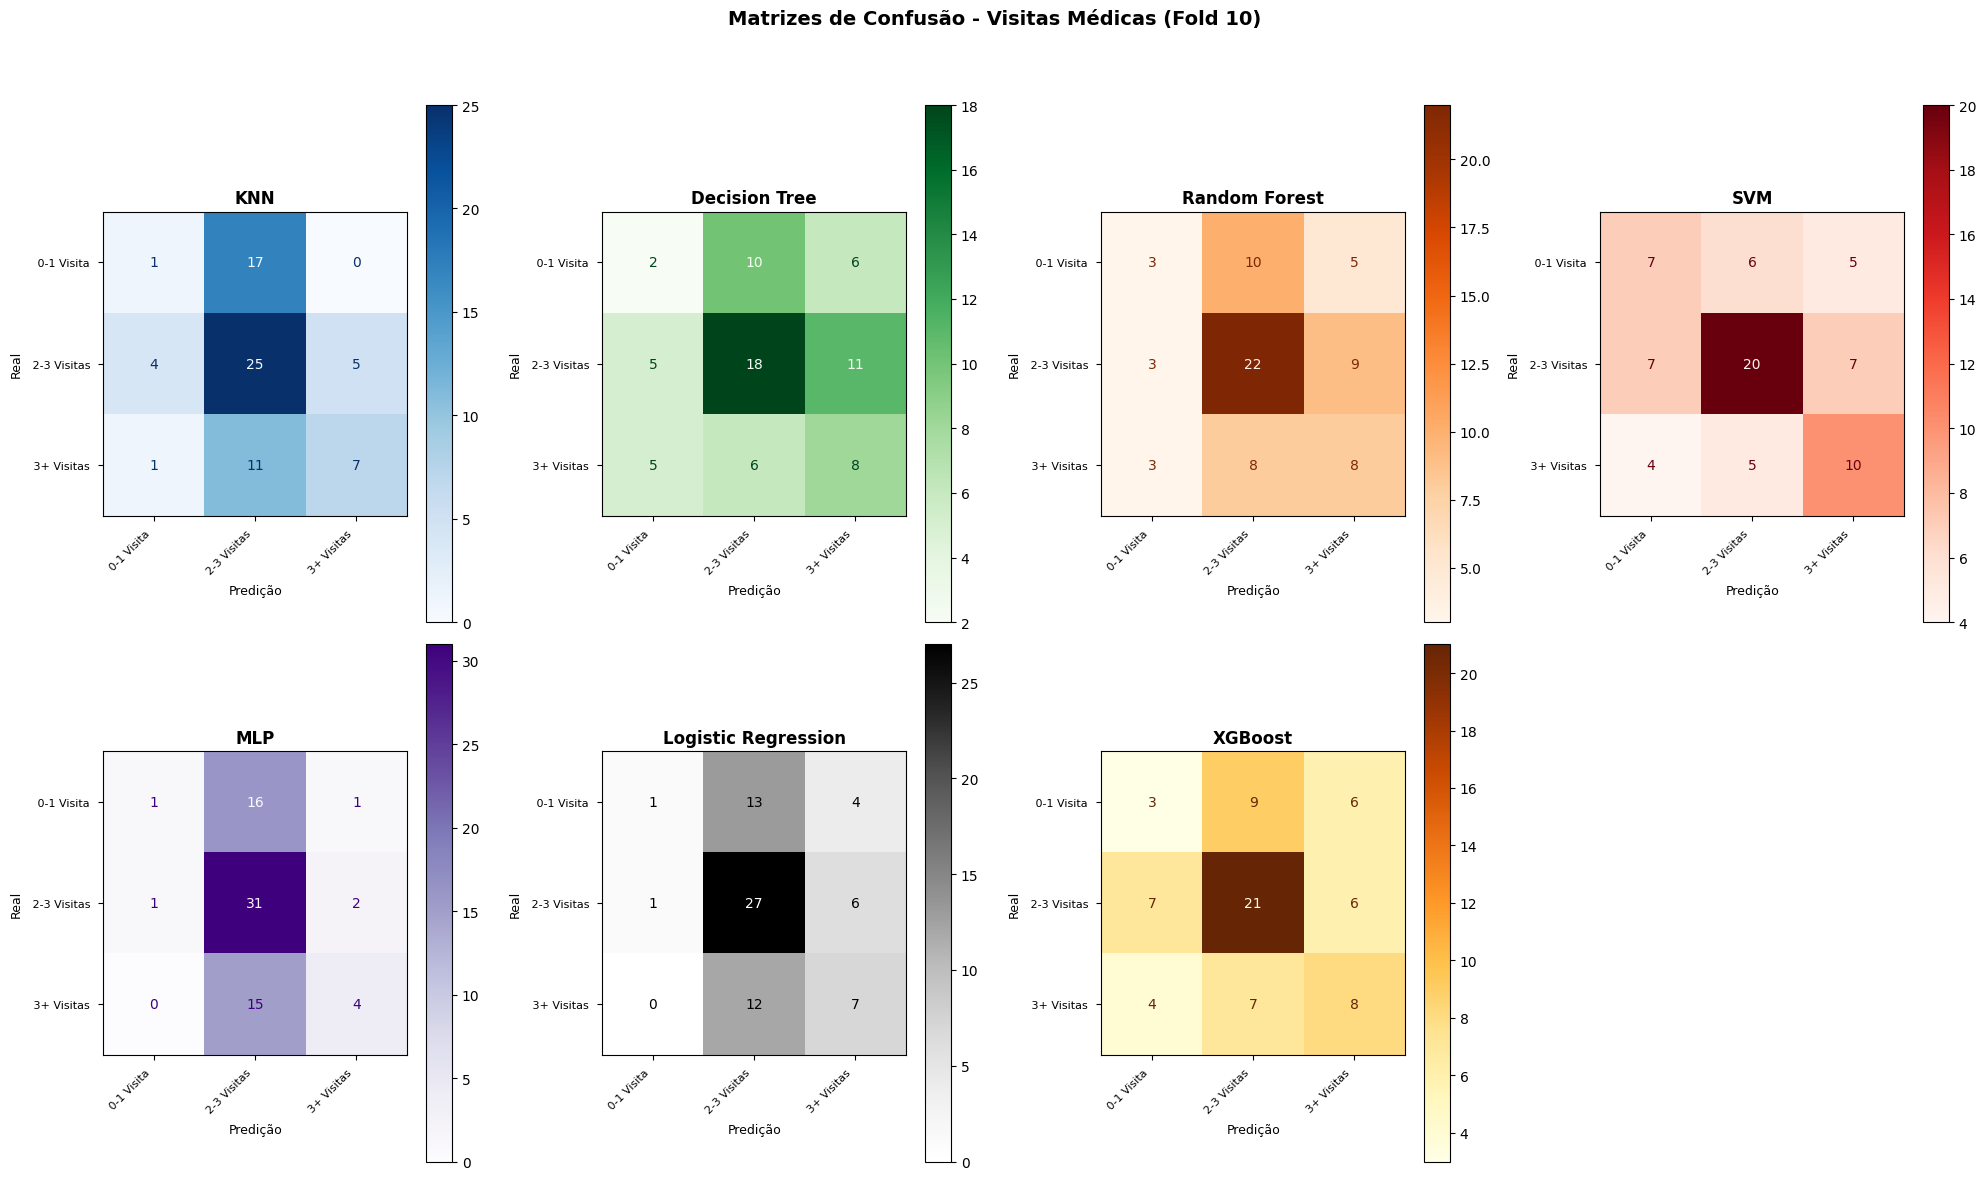

In [ ]:
plt.figure(figsize=(20, 12))
models = ['KNN', 'Decision Tree', 'Random Forest', 'SVM', 'MLP', 'Logistic Regression', 'XGBoost']
confusion_matrices = [cm_knn, cm_dt, cm_rf, cm_svm, cm_mlp, cm_lr, cm_xgb]
colors = ['Blues', 'Greens', 'Oranges', 'Reds', 'Purples', 'Greys', 'YlOrBr']

class_labels = [' 0-1 Visita ', ' 2-3 Visitas ', ' 3+ Visitas ']

for j, (model, cm, color) in enumerate(zip(models, confusion_matrices, colors)):
    plt.subplot(2, 4, j+1)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap=color, ax=plt.gca(), values_format='d')

    plt.title(f'{model}', fontsize=12, fontweight='bold')
    plt.xlabel('Predição', fontsize=9)
    plt.ylabel('Real', fontsize=9)

    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.yticks(fontsize=8)

plt.suptitle(f'Matrizes de Confusão - Visitas Médicas (Fold {i+1})',
             fontsize=14, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

In [ ]:
all_metrics_results = {
    'Acurácia': [
        ('KNeighborsClassifier', acc_test_scores_KNN),
        ('DecisionTreeClassifier', acc_test_scores_DT),
        ('RandomForestClassifier', acc_test_scores_RF),
        ('SVM', acc_test_scores_SVM),
        ('MLPClassifier', acc_test_scores_MLP),
        ('LogisticRegression', acc_test_scores_LR),
        ('XGBClassifier', acc_test_scores_XGB)
    ],
    'Precisão': [
        ('KNeighborsClassifier', precision_test_scores_KNN),
        ('DecisionTreeClassifier', precision_test_scores_DT),
        ('RandomForestClassifier', precision_test_scores_RF),
        ('SVM', precision_test_scores_SVM),
        ('MLPClassifier', precision_test_scores_MLP),
        ('LogisticRegression', precision_test_scores_LR),
        ('XGBClassifier', precision_test_scores_XGB)
    ],
    'Recall': [
        ('KNeighborsClassifier', recall_test_scores_KNN),
        ('DecisionTreeClassifier', recall_test_scores_DT),
        ('RandomForestClassifier', recall_test_scores_RF),
        ('SVM', recall_test_scores_SVM),
        ('MLPClassifier', recall_test_scores_MLP),
        ('LogisticRegression', recall_test_scores_LR),
        ('XGBClassifier', recall_test_scores_XGB)
    ],
    'F1-Score': [
        ('KNeighborsClassifier', f1_test_scores_KNN),
        ('DecisionTreeClassifier', f1_test_scores_DT),
        ('RandomForestClassifier', f1_test_scores_RF),
        ('SVM', f1_test_scores_SVM),
        ('MLPClassifier', f1_test_scores_MLP),
        ('LogisticRegression', f1_test_scores_LR),
        ('XGBClassifier', f1_test_scores_XGB)
    ]
}

alpha = 0.05

for metric_name, model_scores_list in all_metrics_results.items():

    for i in range(len(model_scores_list)):
        for j in range(i + 1, len(model_scores_list)):
            model1_name, scores1 = model_scores_list[i]
            model2_name, scores2 = model_scores_list[j]

            print(f"\nComparando {model1_name} x {model2_name}:")

            if len(scores1) != len(scores2):
                print(f"\t- ERRO: Tamanhos das listas de scores são diferentes.")
                continue
            if len(scores1) < 2:
                print("\t- ERRO: Não há scores suficientes para o teste.")
                continue

            try:
                stat, p_val = wilcoxon(scores1, scores2, zero_method='zsplit', correction=False)
            except ValueError as e:
                print(f"\t- AVISO: Teste de Wilcoxon não pôde ser calculado. ({e})")
                mean1 = np.mean(scores1)
                mean2 = np.mean(scores2)
                print(f"\t- Média {model1_name}: {mean1:.4f}")
                print(f"\t- Média {model2_name}: {mean2:.4f}")
                print("\t-> Sem conclusão estatística.")
                print("----------------------------------------")
                continue

            mean1 = np.mean(scores1)
            mean2 = np.mean(scores2)

            print(f"\t- Amostras (n): {len(scores1)}")
            print(f"\t- Média {model1_name}: {mean1:.4f}")
            print(f"\t- Média {model2_name}: {mean2:.4f}")
            print(f"\t- Estatística Z: {stat:.4f}")
            print(f"\t- Valor-p (p-value): {p_val:.4f}")

            if p_val < alpha:
                print(f"\t-> Resultado: Diferença ESTATISTICAMENTE SIGNIFICATIVA (p < {alpha}).")
                best_model = model1_name if mean1 > mean2 else model2_name
                print(f"\t-> Melhor modelo (pela média): {best_model}")
            else:
                print(f"\t-> Resultado: Sem diferença estatisticamente significativa (p >= {alpha}).")

            print("----------------------------------------")


Comparando KNeighborsClassifier x DecisionTreeClassifier:
	- Amostras (n): 10
	- Média KNeighborsClassifier: 0.4425
	- Média DecisionTreeClassifier: 0.3949
	- Estatística Z: 5.5000
	- Valor-p (p-value): 0.0234
	-> Resultado: Diferença ESTATISTICAMENTE SIGNIFICATIVA (p < 0.05).
	-> Melhor modelo (pela média): KNeighborsClassifier
----------------------------------------

Comparando KNeighborsClassifier x RandomForestClassifier:
	- Amostras (n): 10
	- Média KNeighborsClassifier: 0.4425
	- Média RandomForestClassifier: 0.4469
	- Estatística Z: 27.0000
	- Valor-p (p-value): 1.0000
	-> Resultado: Sem diferença estatisticamente significativa (p >= 0.05).
----------------------------------------

Comparando KNeighborsClassifier x SVM:
	- Amostras (n): 10
	- Média KNeighborsClassifier: 0.4425
	- Média SVM: 0.4077
	- Estatística Z: 16.0000
	- Valor-p (p-value): 0.2656
	-> Resultado: Sem diferença estatisticamente significativa (p >= 0.05).
----------------------------------------

Comparando K